# Load and import data 

In [1]:
import numpy as np 
import pandas as pd 
import pylab as pl 

In [143]:
n = pd.read_csv('/mnt/c/Users/nicolas/Downloads/nhd4width.csv')

area = n['totdasqkm'].values
pos = np.argsort(area)[::-1]
comid = n['comid'].values[pos]
tonode = n['tonode'].values[pos]
fromnode = n['fromnode'].values[pos]
length = n['lengthkm'].values[pos]

lengthTot = np.copy(length)
mask = np.ones(comid.shape)
s = comid.size
for i in range(s):
    pos = np.where(tonode == fromnode[i]) # Find the position of the parent links
    #if pos[0].size > 0:
    lengthTot[pos] += lengthTot[i]*mask[pos] # Adds the lenth of the child to their parents
    mask[pos] = 0

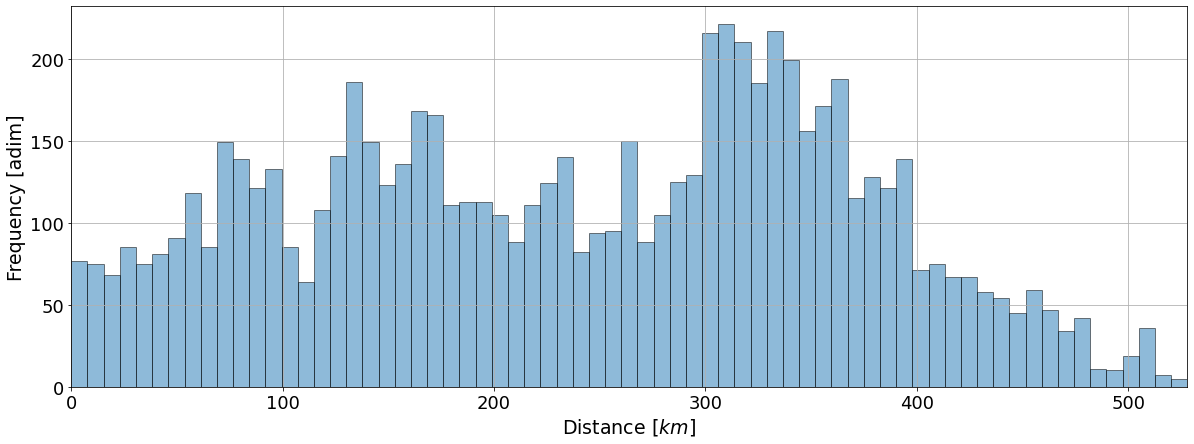

In [144]:

bins = np.linspace(0,lengthTot.max(), 70)
h, b = np.histogram(lengthTot[:s], bins = bins)    
b = (b[1:] + b[:-1]) / 2
fig, ax = pl.subplots(1,1,figsize = (20,7))
ax.bar(b, h, width = bins[1], alpha = 0.5, edgecolor = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance [$km$]', size = 19)
ax.set_ylabel('Frequency [adim]', size = 19)
ax.grid()
ax.set_xlim(0,bins[-1])
pl.savefig('/mnt/c/Users/nicolas/Downloads/nhd4width.png', bbox_inches = 'tight')

In [145]:
s

7369